In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Read the dataset
data = pd.read_csv('heart.csv')  # Adjust filename as needed

In [41]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", data.duplicated().sum())

# Basic statistical summary
print("\nDataset Overview:")
print(data.describe())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 723icate rows:

Dataset Overview:
               age     trestbps        chol          fbs      restecg  \
count  1025.000000  1025.000000  1025.00000  1025.000000  1025.000000   
mean     54.434146   131.611707   246.00000     0.149268     0.529756   
std       9.072290    17.516718    51.59251     0.356527     0.527878   
min      29.000000    94.000000   126.00000     0.000000     0.000000   
25%      48.000000   120.000000   211.00000     0.000000     0.000000   
50%      56.000000   130.000000   240.00000     0.000000     1.000000   
75%      61.000000   140.000000   275.00000     0.000000     1.000000   
max      77.000000   200.000000   564.00000     1.000000     2.000000   

           thalach        exang      oldpeak        slope           ca  \
count 

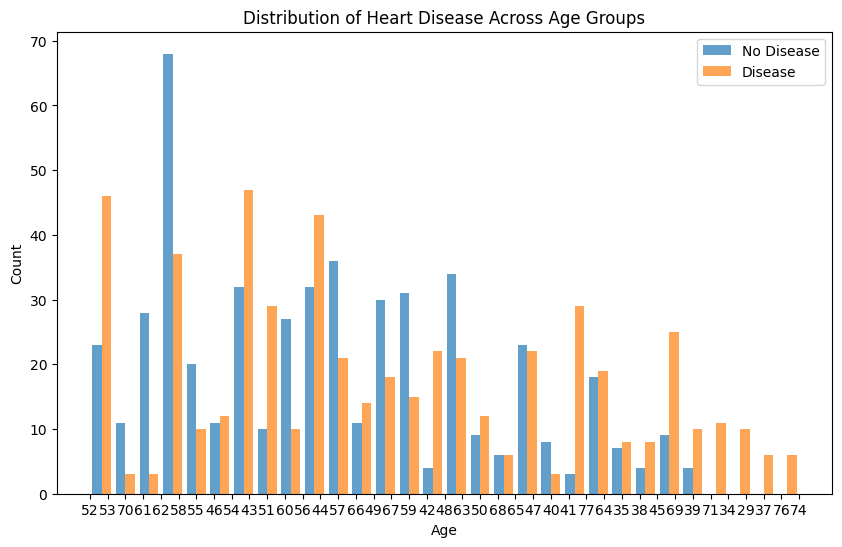

In [10]:
plt.figure(figsize=(10, 6))
plt.hist([data[data['target']==0]['age'], data[data['target']==1]['age']], 
         label=['No Disease', 'Disease'], bins=30, alpha=0.7)
plt.title('Distribution of Heart Disease Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

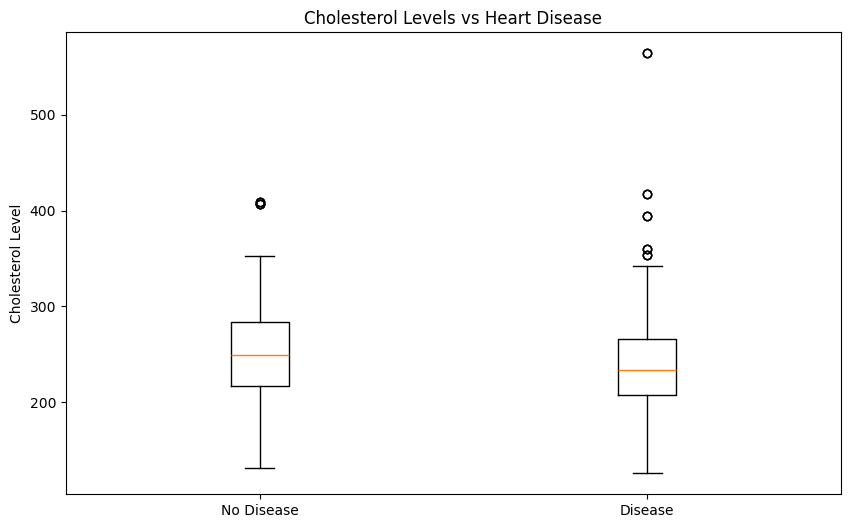

In [11]:
# Question 2: Is there a correlation between cholesterol levels and heart disease?
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['target']==0]['chol'], data[data['target']==1]['chol']], 
            labels=['No Disease', 'Disease'])
plt.title('Cholesterol Levels vs Heart Disease')
plt.ylabel('Cholesterol Level')
plt.show()

<Figure size 800x600 with 0 Axes>

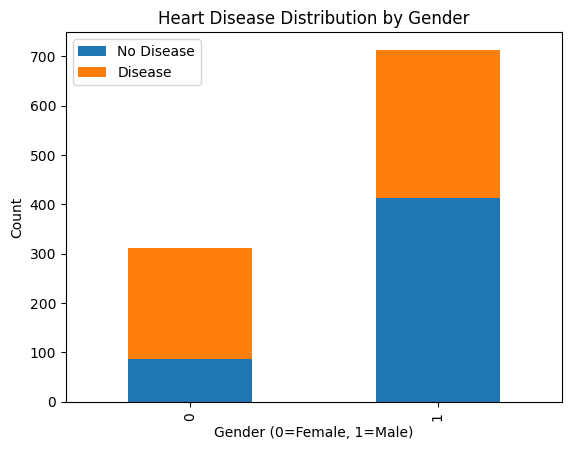

In [12]:
# Question 3: What is the gender distribution in heart disease cases?
gender_disease = pd.crosstab(data['sex'], data['target'])
plt.figure(figsize=(8, 6))
gender_disease.plot(kind='bar', stacked=True)
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

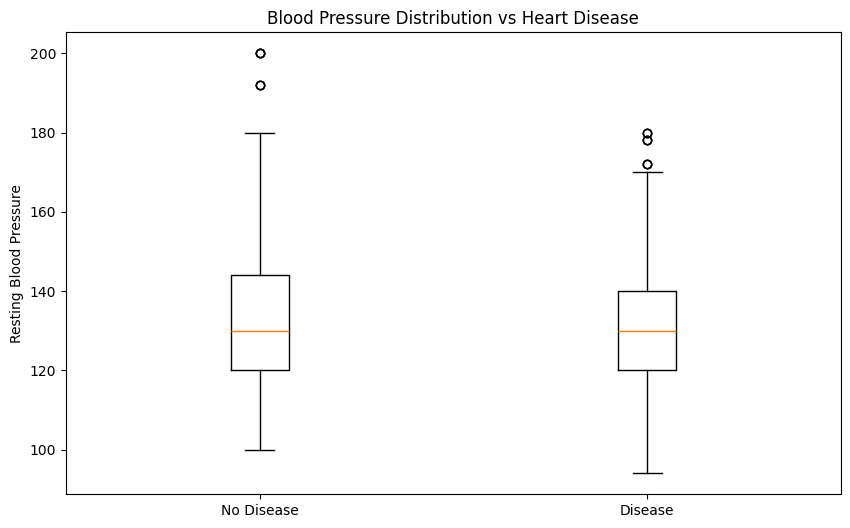

In [13]:
# Question 4: How does blood pressure relate to heart disease?
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['target']==0]['trestbps'], data[data['target']==1]['trestbps']], 
            labels=['No Disease', 'Disease'])
plt.title('Blood Pressure Distribution vs Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.show()

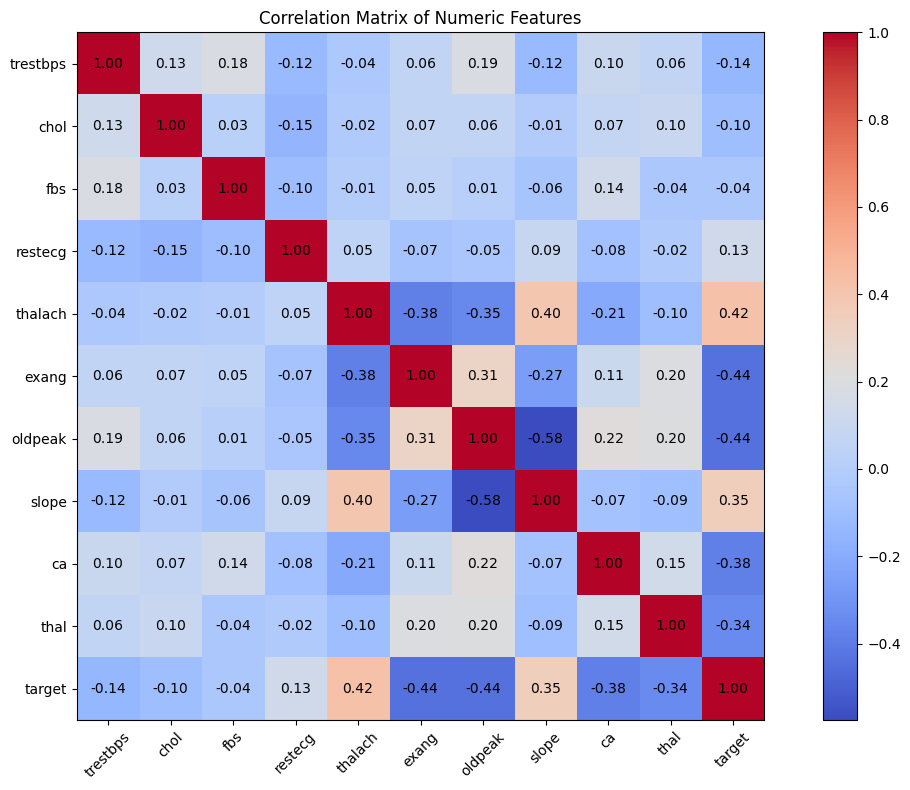

In [16]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data[numeric_columns]

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()

# Create the heatmap
im = plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(im)

# Set the tick labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Numeric Features')

# Add correlation values as text
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center')

plt.tight_layout()
plt.show()

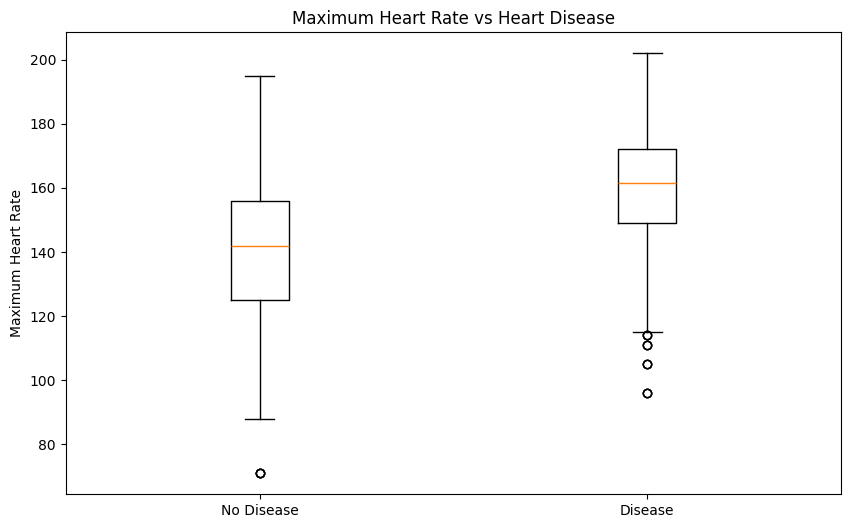

In [18]:
# Question 6: How does maximum heart rate differ between patients with and without heart disease?
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['target']==0]['thalach'], data[data['target']==1]['thalach']], 
            labels=['No Disease', 'Disease'])
plt.title('Maximum Heart Rate vs Heart Disease')
plt.ylabel('Maximum Heart Rate')
plt.show()

<Figure size 1000x600 with 0 Axes>

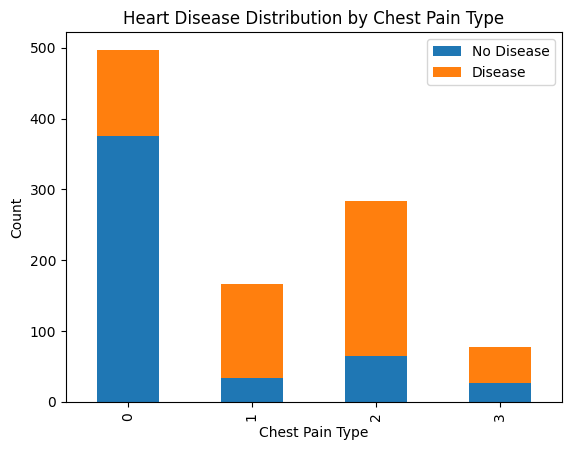

In [20]:
# Question 7: What is the distribution of chest pain types in relation to heart disease?
chest_pain_disease = pd.crosstab(data['cp'], data['target'])
plt.figure(figsize=(10, 6))
chest_pain_disease.plot(kind='bar', stacked=True)
plt.title('Heart Disease Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

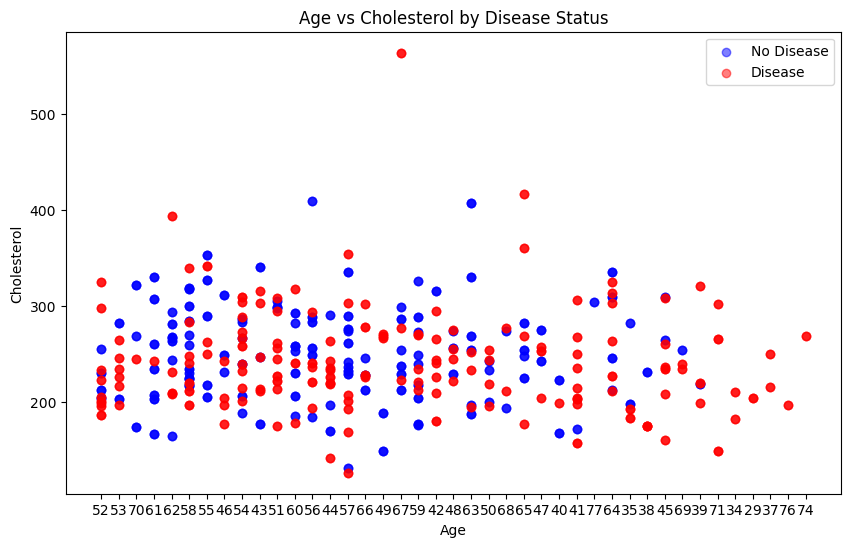

In [24]:
# Additional visualization: Scatter plot of age vs. cholesterol colored by disease status
plt.figure(figsize=(10, 6))
plt.scatter(data[data['target']==0]['age'], data[data['target']==0]['chol'], 
           alpha=0.5, label='No Disease', color='blue')
plt.scatter(data[data['target']==1]['age'], data[data['target']==1]['chol'], 
           alpha=0.5, label='Disease', color='red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol by Disease Status')
plt.legend()
plt.show()


In [35]:

# Convert numeric columns for analysis
numeric_columns = ['age', 'chol', 'trestbps', 'thalach']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Summary statistics by target group
print("\nSummary statistics by heart disease status:")
print(data.groupby('target')[numeric_columns].mean())

# Additional statistical measures
print("\nCorrelation between age and cholesterol:")
print(data['age'].corr(data['chol']))

print("\nDescriptive statistics for key variables:")
print(data[numeric_columns].agg(['mean', 'median', 'std', 'min', 'max']).round(2))

# Additional insights
print("\nAge statistics by heart disease status:")
print(data.groupby('target')['age'].describe().round(2))

# Count of cases by target
print("\nDistribution of heart disease cases:")
print(data['target'].value_counts())



Summary statistics by heart disease status:
              age        chol    trestbps     thalach
target                                               
0.0     56.569138  251.292585  134.106212  139.130261
1.0     52.408745  240.979087  129.245247  158.585551

Correlation between age and cholesterol:
0.2198225346657607

Descriptive statistics for key variables:
          age    chol  trestbps  thalach
mean    54.43  246.00    131.61   149.11
median  56.00  240.00    130.00   152.00
std      9.07   51.59     17.52    23.01
min     29.00  126.00     94.00    71.00
max     77.00  564.00    200.00   202.00

Age statistics by heart disease status:
        count   mean   std   min   25%   50%   75%   max
target                                                  
0.0     499.0  56.57  7.91  35.0  52.0  58.0  62.0  77.0
1.0     526.0  52.41  9.63  29.0  44.0  52.0  59.0  76.0

Distribution of heart disease cases:
target
1.0    526
0.0    499
Name: count, dtype: int64
